<a href="https://colab.research.google.com/github/blbaholo/Consume-Github-API/blob/master/EDA_II_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


In this notebook, exploratory data analysis on an HR dataset will be conducted to demonstrate an understanding of data wrangling, data analysis and providing recommendations.

# Main objective

> To investigate the people and performance of employees.

# Specific objective

* Investigating the overall diversity profile of the organization.

* Idenitify if there is a correlation between employee performance and management.

* Finding the best recruiting sources to ensure a diverse organization.

# Data Understanding

**Description**

The data was sourced from [Kaggle](https://www.kaggle.com/datasets/rhuebner/human-resources-data-set/data). It contents HR information about employees.

**Attributes**

The dataset has 34 attributes and 311 records. Here is a breakdown of the attributes and what they represent:

 * Employee_Name - Employee name
 * EmpID - (Foreign key) Empoyee identification
 * MarriedID - (Foreign key) Marriage identification
 * MaritalStatusID - (Foreign key) Marital status identification
 * GenderID - (Foreign key) Gender identification
 * EmpStatusID - (Foreign key) Employee status identification
 * DeptID - (Foreign key) Department identification
 * PerfScoreID - (Foreign key) Perfomance score identification
 * FromDiversityJobFairID - (Foreign key) Recruitment from diversity job fair identification
 * Salary
 * Termd
 * PositionID - (Foreign key) job title identification
 * Position - Job title
 * State - State of residence
 * Zip - Zip code
 * DOB - Date of birth
 * Sex - Gender idenitification
 * MaritalDesc - Marital status
 * CitizenDesc - US Citizen or non-citizen
 * HispanicLatino - Employee racial identification
 * RaceDesc - Employee racial description (White, Balck or African American, Asian, Two or more races)
 * DateofHire - Date of employee hire
 * DateofTermination - Date of termination
 * TermReason - Termination reason
 * EmploymentStatus - Employment status (Terminated for Cause, Active, Voluntarily terminated)
 * Department - Employee's department
 * ManagerName - Employee's manager
 * ManagerID - (Foreign key) Manager Identification
 * RecruitmentSource - Employee recruitment Source
 * PerformanceScore - Employee performance score (Exceeds, Fully Meets, Needs Improvement, PIP)
 * EngagementSurvey - Employee engagment rating out of 5
 * EmpSatisfaction - Employee satisfaction rating out of 5
 * SpecialProjectsCount
 * LastPerformanceReview_Date - Date of last performance reiew
 * DaysLateLast30 - Number of days late   
 * Absences - Number of days absent  

# Data Importation

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the plots remain within the notebook
%matplotlib inline

# Set a consistent plot style
plt.style.use("ggplot")

In [ ]:
# load data

df = pd.read_csv("/content/HRDataset_v14.csv")

# Read first few rows
df.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,...,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,...,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


In [ ]:
# Brief exploration of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

The following columns contain null values: ManagerID and DateofTermination.

# Data Wrangling

## Completeness

**Imputing placeholders and filling in null values**

In [ ]:
# Assigning placeholder for DateofTermination
df["DateofTermination"].fillna("00/00/0000", inplace=True)
df["DateofTermination"].isnull().sum()

0

Upon investigation of all 8 null values in the ManagerID column, the null values are from the manager, Webster Butler, whose ManagerID = 39 is given in other columns. Thus all null values within this column will be filled with that value.

In [ ]:
# Verifing that all ManagerID null values are from Manager, Webster Butler
df["ManagerName"][(df["ManagerID"].isnull()) & (df["ManagerName"] == "Webster Butler")].count()

8

In [ ]:
# Fill ManagerID null values with the identified manager's ID.
df["ManagerID"].fillna(39.0, inplace=True)
df.isnull().sum()

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     0
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatis

## Consistency

In [ ]:
# Check for duplicates

df.duplicated().sum()

0

Data doesn't contain any duplicates

# Exploratory Data Analysis

In this section of the notebook analysis and recommendations will be provided for the specific objectives.

In [ ]:
df["RaceDesc"].unique()

array(['White', 'Black or African American', 'Two or more races', 'Asian',
       'American Indian or Alaska Native', 'Hispanic'], dtype=object)

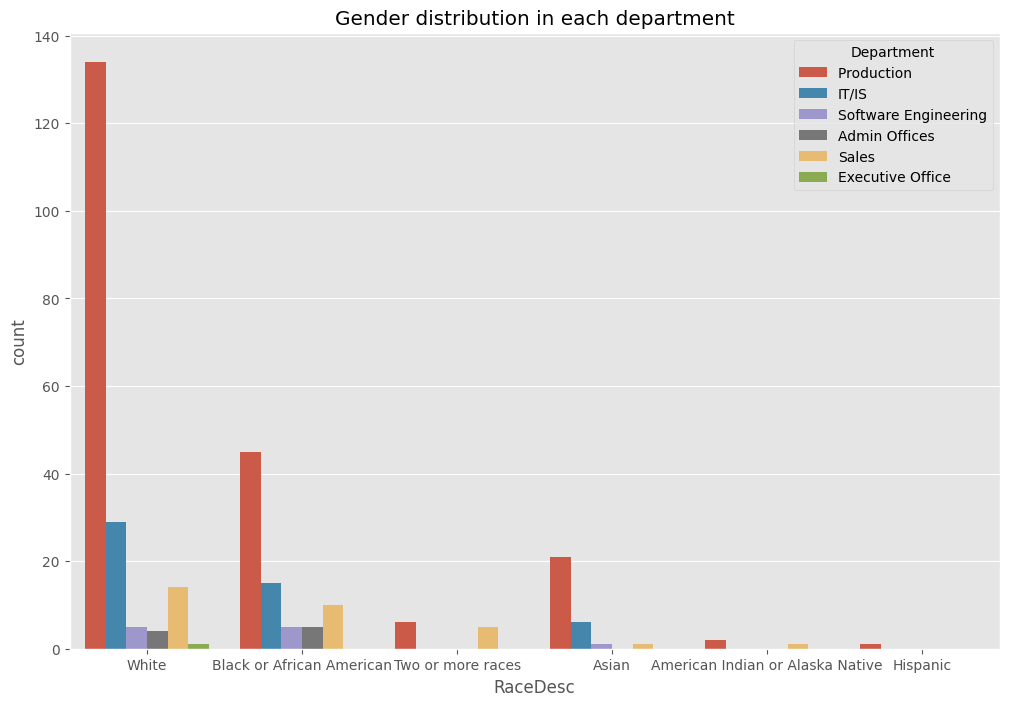

In [ ]:
# Gender distrubution within the company.

# Set figure size.
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bar graph
sns.countplot(data=df, x='RaceDesc', hue='Department')
ax.set_title("Gender distribution in each department")
plt.show()

The production department has the largest gap between male and female employee.

<Axes: xlabel='EmpSatisfaction', ylabel='Salary'>

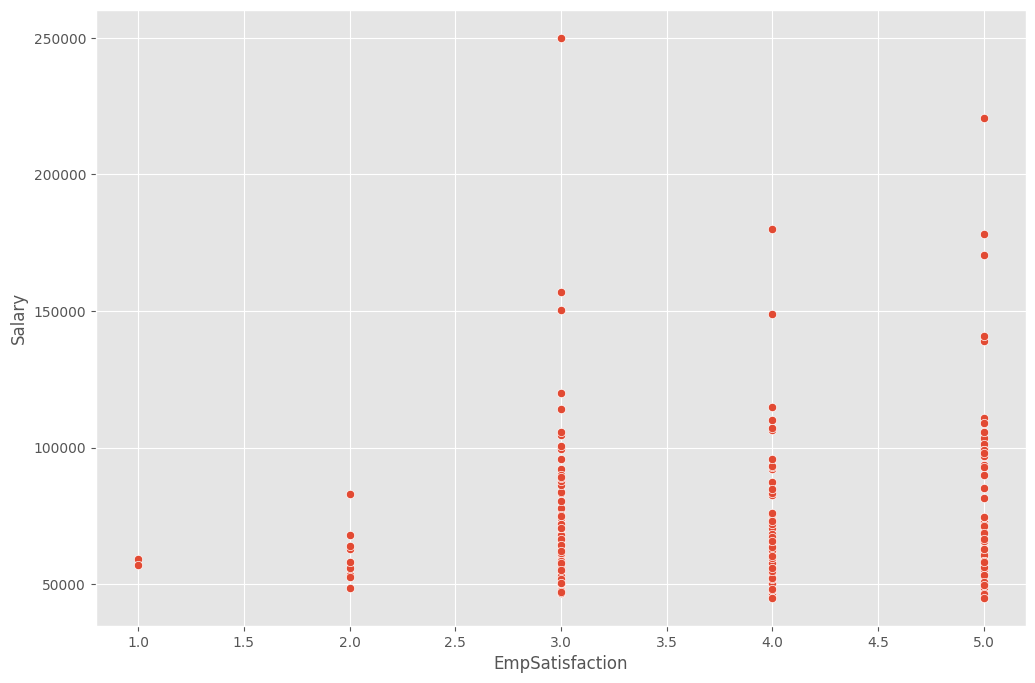

In [ ]:
# Set figure size.
fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot with hue and size reflecting
sns.scatterplot(x="EmpSatisfaction", y="Salary",
                data=df, ax=ax, marker='o')


# Customize x and y axis
#ax.set_xlabel('Annual Income($)')
#ax.set_title('Income Influence over Miles Desired and Product Bought', fontsize=18)

# Fixing the position of the legend
#plt.legend(loc='upper right');